In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import splu

In [34]:
ħ = 1.0
m = 1.0
L = 20.0
Nx = 1000
x = np.linspace(-L, L, Nx)
dx = x[1] - x[0]
dt = 0.01
Nt = 1000
t_points = [0, 50, 100, 200, 300]

V0 = -5.0
σ_v = 1.0
x0_v = 0.0
V = V0 * np.exp(-(x - x0_v)**2 / (2 * σ_v**2))

In [36]:
x0 = -8.0
σ_w = 1.0
k0 = 2.0
psi = np.exp(-(x - x0)**2 / (2 * σ_w**2)) * np.exp(1j * k0 * x)
psi /= np.sqrt(np.trapz(np.abs(psi)**2, x))

r = 1j * ħ * dt / (2 * m * dx**2)
diag_main = 1 + 2 * r + 1j * dt / (2 * ħ) * V
diag_off = -r * np.ones(Nx - 1)

A = diags([diag_off, diag_main, diag_off], offsets=[-1, 0, 1], format='csc')
B = diags([-diag_off, 1 - 2 * r - 1j * dt / (2 * ħ) * V, -diag_off], offsets=[-1, 0, 1], format='csc')

In [38]:
lu = splu(A)

psi_list = []

for t in range(Nt):
    rhs = B.dot(psi)
    psi = lu.solve(rhs)
    if t in t_points:
        psi_list.append(np.abs(psi)**2)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\shown\AppData\Local\Temp\ipykernel_42672\1850299161.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("Probability Density $|\psi(x, t)|^2$")


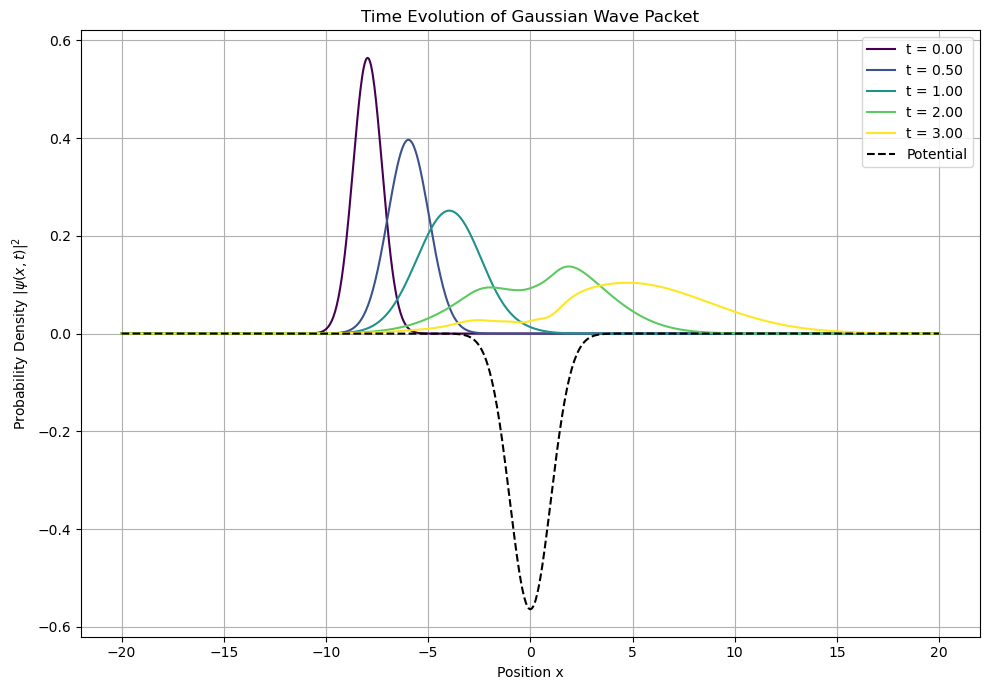

In [40]:
plt.figure(figsize=(10, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(t_points)))
for i, t_index in enumerate(t_points):
    plt.plot(x, psi_list[i], label=f"t = {t_index * dt:.2f}", color=colors[i])
plt.plot(x, V / np.abs(V0) * max(np.max(p) for p in psi_list), 'k--', label="Potential")

plt.xlabel("Position x")
plt.ylabel("Probability Density $|\psi(x, t)|^2$")
plt.title("Time Evolution of Gaussian Wave Packet")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()